<h1 style="text-align: center;"> Bay Area Rapid Transit -BART

### BART ist das öffentliche Nahverkehrssystem der San Francisco Bay Area in Kalifornien. BART betreibt sechs Strecken, 46 Stationen und ein 180 Kilometer langes Schienennetz. An Wochentagen befördert es durchschnittlich 423.000 Menschen und ist damit das fünftgrößte Schnellbahnsystem der USA

<h1 style="text-align: center;">
<img src="https://tse1.mm.bing.net/th/id/OIP.wzU_ABnWQ7TNmQCilvvltAHaHO?pid=Api&P=0&h=180"/>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [2]:
df_st = pd.read_csv("station_info.csv")       # Stationen: Name, Koordinaten etc.
df_16 = pd.read_csv("date-hour-soo-dest-2016.csv")
df_17 = pd.read_csv("date-hour-soo-dest-2017.csv")


In [3]:
df_st.head(1)

,Abbreviation,Description,Location,Name
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH)


In [4]:
df_16.head(1)

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00


In [5]:
df_17.head(1)

,Origin,Destination,Throughput,DateTime
0,12TH,19TH,1,2017-01-01 00:00:00


## zusammenfügen vom jahr2016/17

In [6]:
df_1617 = pd.concat([df_16, df_17], ignore_index=True)

In [7]:
df_1617.head(1)

,Origin,Destination,Throughput,DateTime
0,12TH,12TH,1,2016-01-01 00:00:00


In [8]:
df_1617.isna().sum() 

Origin         0
Destination    0
Throughput     0
DateTime       0
dtype: int64

In [9]:
df_1617['DateTime'] = pd.to_datetime(df_1617['DateTime'])
df_1617['Weekday'] = df_1617['DateTime'].dt.day_name()
df_1617['Hour'] = df_1617['DateTime'].dt.hour

In [10]:
df_1617.head(1)

,Origin,Destination,Throughput,DateTime,Weekday,Hour
0,12TH,12TH,1,2016-01-01,Friday,0


In [11]:
df_st['lon'] = df_st.Location.str.split(",",expand=True)[0].astype(float)
df_st['lat'] = df_st.Location.str.split(",",expand=True)[1].astype(float)

In [12]:
df_st

,Abbreviation,Description,Location,Name,lon,lat
0,12TH,"1245 Broadway, Oakland CA 94612<br />12th St. ...","-122.271450,37.803768,0",12th St. Oakland City Center (12TH),-122.271450,37.803768
1,16TH,"2000 Mission Street, San Francisco CA 94110<br...","-122.419694,37.765062,0",16th St. Mission (16TH),-122.419694,37.765062
2,19TH,"1900 Broadway, Oakland CA 94612<br />19th Stre...","-122.268602,37.808350,0",19th St. Oakland (19TH),-122.268602,37.808350
3,24TH,"2800 Mission Street, San Francisco CA 94110<br...","-122.418143,37.752470,0",24th St. Mission (24TH),-122.418143,37.752470
4,ASHB,"3100 Adeline Street, Berkeley CA 94703<br />As...","-122.270062,37.852803,0",Ashby (ASHB),-122.270062,37.852803
5,BALB,"401 Geneva Avenue, San Francisco CA 94112<br /...","-122.447506,37.721585,0",Balboa Park (BALB),-122.447506,37.721585
6,BAYF,"15242 Hesperian Blvd., San Leandro CA 94578<br...","-122.126514,37.696924,0",Bay Fair (BAYF),-122.126514,37.696924
7,CAST,"3301 Norbridge Dr., Castro Valley CA 94546<br ...","-122.075602,37.690746,0",Castro Valley (CAST),-122.075602,37.690746
8,CIVC,"1150 Market Street, San Francisco CA 94102<br ...","-122.414123,37.779732,0",Civic Center/UN Plaza (CIVC),-122.414123,37.779732
9,COLS,"7200 San Leandro St., Oakland CA 94621<br />We...","-122.196869,37.753661,0",Coliseum/Oakland Airport (COLS),-122.196869,37.753661


In [13]:
# Spalten umbenennen
df_st_fix = df_st.rename(columns={
    "Abbreviation": "station_code",
    "Name": "station_name"
})[["station_code", "station_name", "lat", "lon"]]

In [14]:
# Codes in beiden DataFrames upper + trim  KLEINSCHREIBUNG 
df_1617[["Origin", "Destination"]] = df_1617[["Origin", "Destination"]].apply(lambda x: x.str.strip().str.upper())
df_st_fix["station_code"] = df_st_fix["station_code"].str.strip().str.upper()


In [15]:
# Join für Origin
df_1617 = df_1617.merge(df_st_fix, how="left", left_on="Origin", right_on="station_code") \
    .rename(columns={"lat": "origin_lat", "lon": "origin_lon", "station_name": "origin_name"}) \
    .drop(columns=["station_code"])

In [16]:
# Join für Destination
df_1617 = df_1617.merge(df_st_fix, how="left", left_on="Destination", right_on="station_code") \
    .rename(columns={"lat": "dest_lat", "lon": "dest_lon", "station_name": "dest_name"}) \
    .drop(columns=["station_code"])

# Kontrolle: Fehlende Zuordnungen in der Station

In [17]:
# Alle Codes in Trips
codes_trips = set(df_1617["Origin"]).union(set(df_1617["Destination"]))

In [18]:
# Alle Codes in Stationstabelle
codes_stations = set(df_st_fix["station_code"])

In [19]:
# Differenzen
fehlende_in_stations = codes_trips - codes_stations
fehlende_in_trips = codes_stations - codes_trips



In [20]:
print("Fehlen in Stationstabelle:", fehlende_in_stations)
print("Fehlen in Trips:", fehlende_in_trips)

Fehlen in Stationstabelle: {'WSPR'}
Fehlen in Trips: {'WARM'}


In [21]:
# Laut daten sind  WARM und WSPR lgeiche Stataion daher auch umändern 

In [22]:
alias = {
    "WSPR": "WARM"
}

df_1617[["Origin", "Destination"]] = (
    df_1617[["Origin", "Destination"]]
    .replace(alias)
)

## TOP Routen

In [23]:
keys = [c for c in ('Origin','Destination','origin_name','dest_name') if c in df_1617.columns]

top15 = (
    df_1617
    .groupby(keys, dropna=False)['Throughput']
    .sum()
    .reset_index(name='trips')          # MultiIndex vermeiden
    .nlargest(15, 'trips')              
)
top15


,Origin,Destination,origin_name,dest_name,trips
1523,POWL,BALB,Powell St. (POWL),Balboa Park (BALB),1105884
255,BALB,MONT,Balboa Park (BALB),Montgomery St. (MONT),1013860
263,BALB,POWL,Balboa Park (BALB),Powell St. (POWL),938212
1521,POWL,24TH,Powell St. (POWL),24th St. Mission (24TH),913309
706,DUBL,EMBR,Dublin/Pleasanton (DUBL),Embarcadero (EMBR),901632
163,24TH,MONT,24th St. Mission (24TH),Montgomery St. (MONT),898585
798,FRMT,EMBR,Fremont (FRMT),Embarcadero (EMBR),810277
171,24TH,POWL,24th St. Mission (24TH),Powell St. (POWL),789335
2086,WOAK,EMBR,West Oakland (WOAK),Embarcadero (EMBR),788083
1153,MONT,24TH,Montgomery St. (MONT),24th St. Mission (24TH),774595


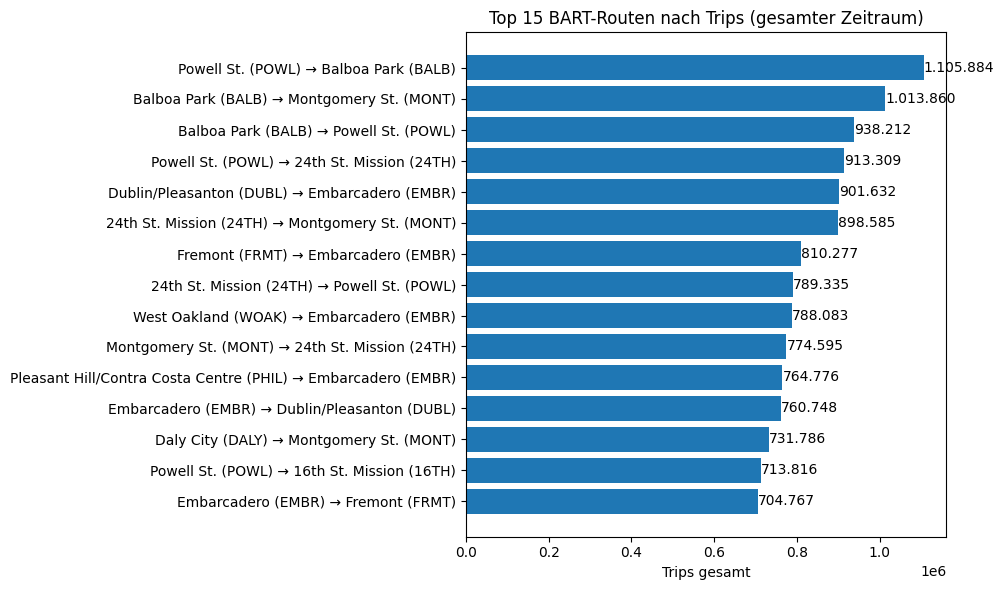

In [25]:
top15['route'] = top15['origin_name'] + " → " + top15['dest_name']
plt.figure(figsize=(10,6))
bars = plt.barh(top15['route'], top15['trips'])
plt.gca().invert_yaxis()
plt.title('Top 15 BART-Routen nach Trips (gesamter Zeitraum)')
plt.xlabel('Trips gesamt')

# Werte an die Balken schreiben (mit Tausendertrennzeichen)
for b, v in zip(bars, top15['trips']):
    plt.text(v, b.get_y() + b.get_height()/2, f"{int(v):,}".replace(',', '.'), va='center', ha='left')
plt.tight_layout(); plt.show()


In [26]:
# Zeitspalte (bei dir: 'DateTime')
time_col = 'DateTime'
df_1617[time_col] = pd.to_datetime(df_1617[time_col], errors='coerce')
df_1617['date_only'] = df_1617[time_col].dt.date

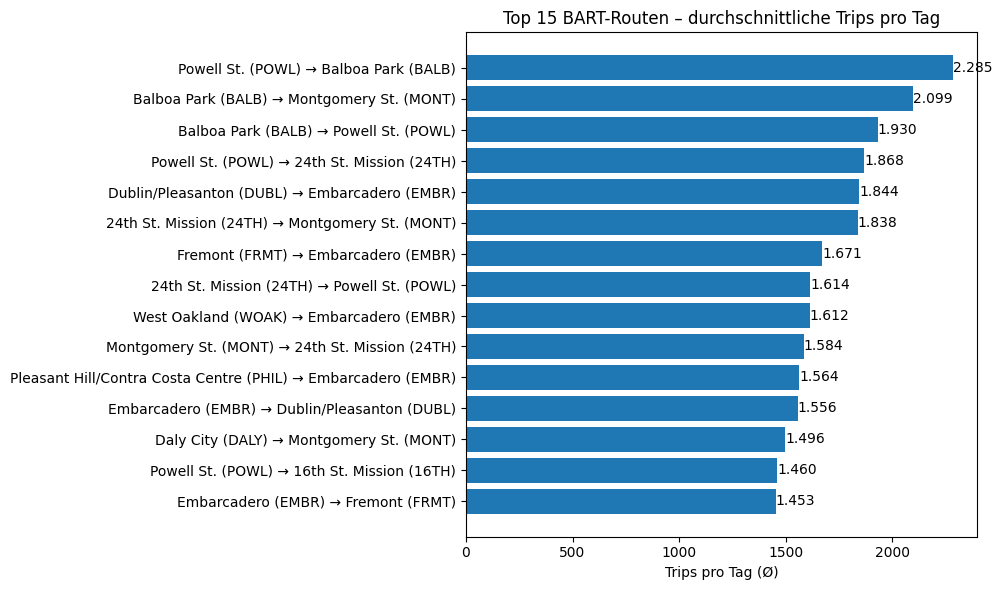

In [27]:
# 1) pro Route & Tag summieren
daily = df_1617.groupby(keys + ['date_only'], dropna=False)['Throughput'].sum().reset_index()
# 2) pro Route Tagesmittel
avg_daily = (daily.groupby(keys, dropna=False)['Throughput'].mean()
             .reset_index(name='avg_trips_per_day')
             .nlargest(15, 'avg_trips_per_day'))
avg_daily['route'] = avg_daily['origin_name'] + " → " + avg_daily['dest_name']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
bars = plt.barh(avg_daily['route'], avg_daily['avg_trips_per_day'])
plt.gca().invert_yaxis()
plt.title('Top 15 BART-Routen – durchschnittliche Trips pro Tag')
plt.xlabel('Trips pro Tag (Ø)')

for b, v in zip(bars, avg_daily['avg_trips_per_day']):
    plt.text(v, b.get_y() + b.get_height()/2, f"{v:,.0f}".replace(',', '.'), va='center', ha='left')
plt.tight_layout(); plt.show()

## Wochentage 

In [28]:
df_1617['hour'] = df_1617[time_col].dt.hour
df_1617['dow']  = df_1617[time_col].dt.dayofweek  # 0=Mo ... 6=So

hourly = df_1617.groupby('hour')['Throughput'].sum().reset_index(name='trips')
dow    = df_1617.groupby('dow')['Throughput'].sum().reset_index(name='trips')


<Axes: title={'center': 'Ø Trips pro Stunde'}, xlabel='hour'>

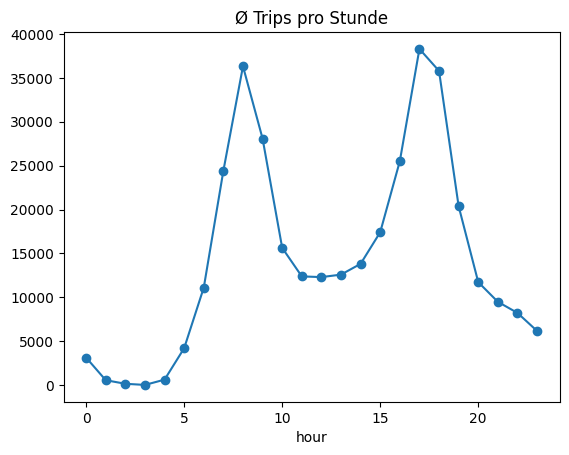

In [29]:
df_1617['hour'] = df_1617[time_col].dt.hour
hourly_avg = (df_1617.groupby(['date_only','hour'])['Throughput'].sum()
              .groupby('hour').mean())
hourly_avg.plot(marker='o', title='Ø Trips pro Stunde')


[Text(0, 0, 'Mo'),
 Text(1, 0, 'Di'),
 Text(2, 0, 'Mi'),
 Text(3, 0, 'Do'),
 Text(4, 0, 'Fr'),
 Text(5, 0, 'Sa'),
 Text(6, 0, 'So')]

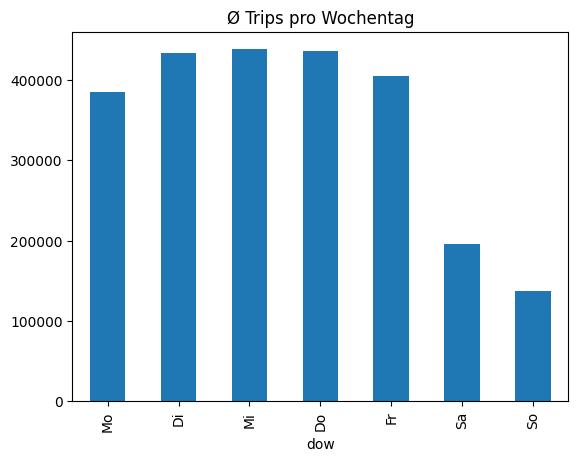

In [30]:
df_1617['dow'] = df_1617[time_col].dt.dayofweek
dow_avg = (df_1617.groupby(['date_only','dow'])['Throughput'].sum()
           .groupby('dow').mean())
ax = dow_avg.plot(kind='bar', title='Ø Trips pro Wochentag')
ax.set_xticklabels(['Mo','Di','Mi','Do','Fr','Sa','So'])


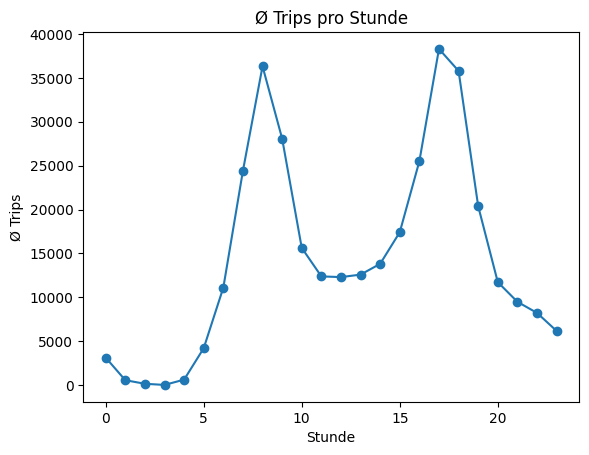

In [32]:
df_1617['hour'] = df_1617[time_col].dt.hour
hourly_avg = (df_1617.groupby(['date_only','hour'])['Throughput'].sum()
              .groupby('hour').mean())
hourly_avg.plot(marker='o', title='Ø Trips pro Stunde'); plt.xlabel('Stunde'); plt.ylabel('Ø Trips'); plt.show() 


In [33]:
top15.to_csv('bart_top15_total.csv', index=False)
hourly_avg.to_csv('bart_hourly_avg.csv', index=False)
dow_avg.to_csv('bart_weekday_avg.csv', index=False)
